# Analisi e classificazione dati ottenuti da dispositiv FitBit e Apple Watch

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [19]:
data = pd.read_csv(r"C:\Users\albeb\Downloads\aw_fb_data.csv\aw_fb_data.csv")
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


## Analisi esplorativa

Confronto numero di dati raccolti su persone di genere maschile e femminile

<Axes: xlabel='gender'>

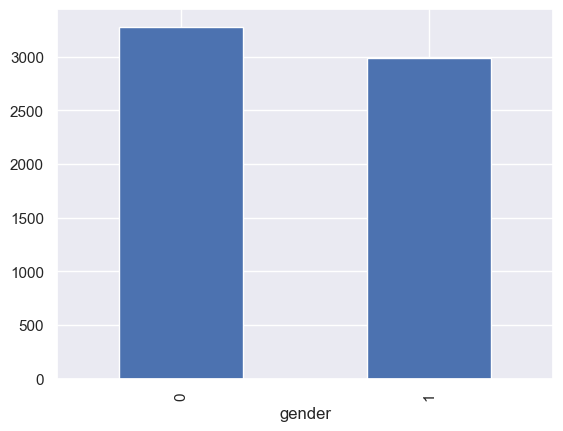

In [20]:
data['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

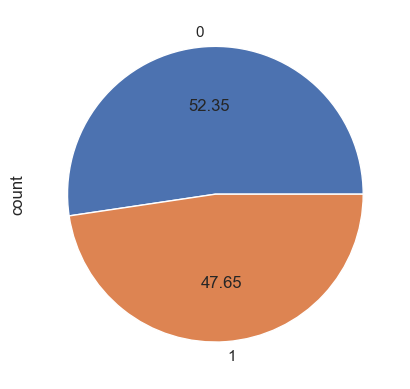

In [21]:
data['gender'].value_counts().plot(kind='pie',autopct='%.2f')

Nel Dataset si ha una leggera preponderanza del genere maschile rispetto al femminile

Confronto il numero di dati raccolto con i due tipi di "smartwatch" (FitBit e Apple Watch) 

<Axes: xlabel='device'>

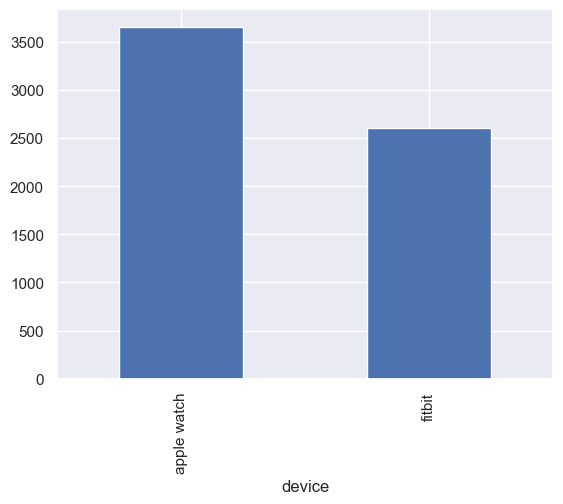

In [22]:
data['device'].value_counts().plot(kind='bar')

Confronto l'età

<Axes: xlabel='age'>

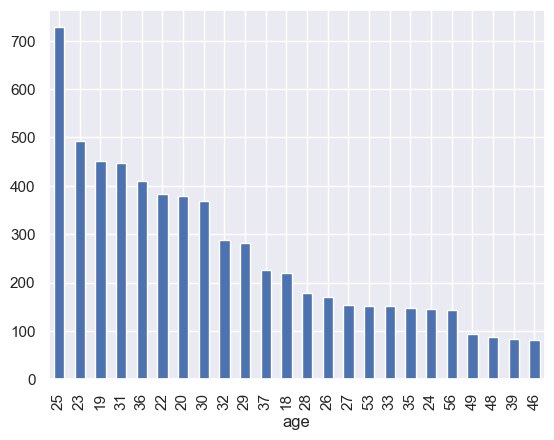

In [23]:
data['age'].value_counts().plot(kind='bar')

Ora considero la variabile di risposta (la tipologia di movimento compiuta dal soggetto)

<Axes: ylabel='count'>

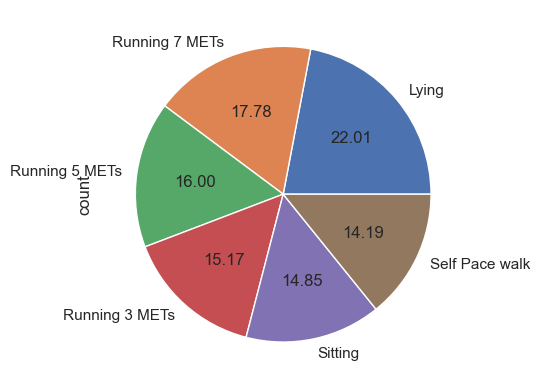

In [24]:
data['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='activity'>

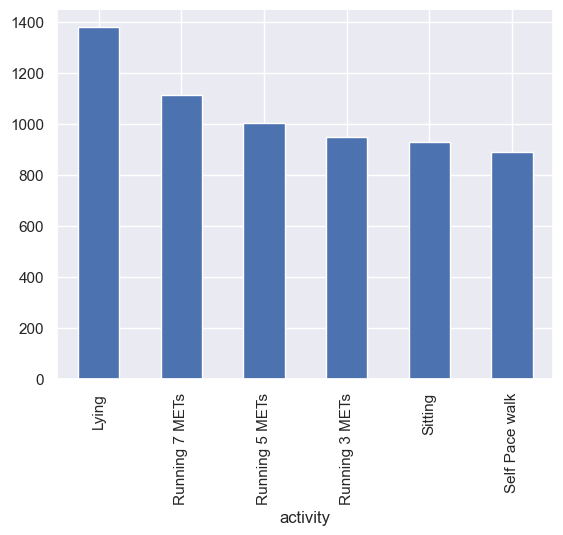

In [25]:
data['activity'].value_counts().plot(kind='bar')

Scarto ora le variabili non utili o interessanti al fine della nostra analisi

In [26]:
df= data.drop(['device','Unnamed: 0','X1','entropy_heart', 'entropy_setps',
                'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
                'sd_norm_heart', 'steps_times_distance'], axis=1)

In [27]:
df.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,59.0,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,59.0,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,59.0,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,59.0,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,59.0,Lying


Riporto ora le principali statistiche descrittive delle variabili rimanenti

In [28]:
df.describe()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,65.869938
std,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,21.203017
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,3.000000
25%,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,58.134333
50%,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,75.000000
75%,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,76.138701
max,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,155.000000


Ora codifico la variabile di risposta (categorica) in una variabile intera

In [29]:
label_encoder=LabelEncoder()

In [30]:
encoder=label_encoder.fit(df['activity'])
ac_data1=encoder.transform(df['activity'])

Mostro la codifica corrispondente all'azione compiuta dal soggetto

In [31]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(mapping)

{'Lying': 0, 'Running 3 METs': 1, 'Running 5 METs': 2, 'Running 7 METs': 3, 'Self Pace walk': 4, 'Sitting': 5}


In [32]:
resp_var=df['activity']
exp_var=df.drop(columns='activity')

In [33]:
exp_var.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,59.0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,59.0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,59.0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,59.0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,59.0


# Classificazione dati e previsione

Divido il dataset in training e test set (80% training e 20% test)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(exp_var, resp_var, test_size = 0.2)

Alleno e testo vari classificatori:

### Classificazione basata sui vicini più prossimi 

In [35]:
def classificazione_previsione(model, explanatory_test, response_test):
    predict_model = model.predict(explanatory_test)
    predict_proba_model = model.predict_proba(explanatory_test)[:, 1]
    print('Accuracy_model: ', metrics.accuracy_score(response_test, predict_model))
    print(metrics.classification_report(response_test, predict_model))

In [40]:
knn_classification=sklearn.neighbors.KNeighborsClassifier()
knn_classification.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
classificazione_previsione(knn_classification,X_test,y_test)

Accuracy_model:  0.6105347166799681
                precision    recall  f1-score   support

         Lying       0.52      0.64      0.58       263
Running 3 METs       0.68      0.67      0.67       194
Running 5 METs       0.64      0.73      0.69       203
Running 7 METs       0.75      0.65      0.69       232
Self Pace walk       0.65      0.59      0.62       174
       Sitting       0.44      0.34      0.38       187

      accuracy                           0.61      1253
     macro avg       0.61      0.60      0.61      1253
  weighted avg       0.61      0.61      0.61      1253



Accuratezza del 65%

### Classificazione con alberi di decisione

In [38]:
albero_dec=sklearn.tree.DecisionTreeClassifier()
albero_dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
classificazione_previsione(albero_dec,X_test,y_test)

Accuracy_model:  0.767757382282522
                precision    recall  f1-score   support

         Lying       0.75      0.78      0.77       263
Running 3 METs       0.76      0.78      0.77       194
Running 5 METs       0.75      0.76      0.75       203
Running 7 METs       0.85      0.81      0.83       232
Self Pace walk       0.78      0.74      0.76       174
       Sitting       0.70      0.71      0.70       187

      accuracy                           0.77      1253
     macro avg       0.77      0.76      0.77      1253
  weighted avg       0.77      0.77      0.77      1253



Accuratezza del 75%

### Gradient Boost Classifier

In [54]:
model_gb = sklearn.ensemble.GradientBoostingClassifier()
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [55]:
classificazione_previsione(model_gb,X_test,y_test)

Accuracy_model:  0.664804469273743
                precision    recall  f1-score   support

         Lying       0.56      0.69      0.62       263
Running 3 METs       0.69      0.68      0.68       194
Running 5 METs       0.68      0.74      0.71       203
Running 7 METs       0.80      0.74      0.77       232
Self Pace walk       0.73      0.61      0.67       174
       Sitting       0.58      0.49      0.53       187

      accuracy                           0.66      1253
     macro avg       0.67      0.66      0.66      1253
  weighted avg       0.67      0.66      0.66      1253



66% di accuratezza

### Classificazione con Random Forest

In [44]:
attr=list(X_train.columns)

In [51]:
rndfor= sklearn.ensemble.RandomForestClassifier()
rndfor.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
classificazione_previsione(rndfor,X_test,y_test)

Accuracy_model:  0.8427773343974462
                precision    recall  f1-score   support

         Lying       0.79      0.85      0.82       263
Running 3 METs       0.85      0.88      0.87       194
Running 5 METs       0.85      0.87      0.86       203
Running 7 METs       0.95      0.89      0.92       232
Self Pace walk       0.85      0.78      0.81       174
       Sitting       0.78      0.76      0.77       187

      accuracy                           0.84      1253
     macro avg       0.84      0.84      0.84      1253
  weighted avg       0.84      0.84      0.84      1253



Text(0.5, 1.0, 'Matrice di Confusione')

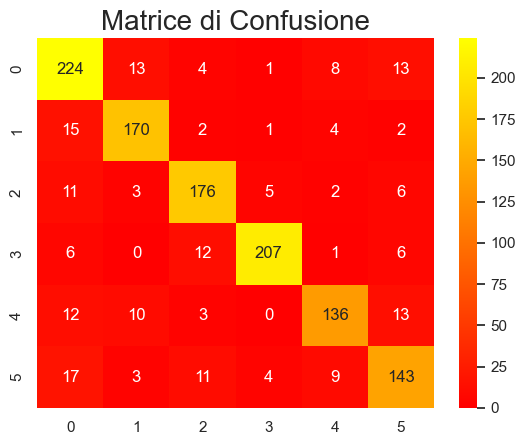

In [53]:
y_predetto = rndfor.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_predetto)
sns.heatmap(cm_xgb, annot = True, fmt = 'g', cmap="autumn")
plt.title("Matrice di Confusione", fontsize = 20)

Accuratezza del 84%

### Multi Layer Perceptron

In [39]:
mlperc= sklearn.neural_network.MLPClassifier()
mlperc.fit(X_train,y_train)

MLPClassifier()

In [134]:
classificazione_previsione(mlperc,X_test,y_test)

Accuracy_model:  0.41500399042298486
              precision    recall  f1-score   support

           0       0.36      0.55      0.44       260
           1       0.57      0.13      0.21       188
           2       0.41      0.47      0.44       202
           3       0.47      0.72      0.57       229
           4       0.40      0.43      0.41       199
           5       0.40      0.03      0.06       175

    accuracy                           0.42      1253
   macro avg       0.44      0.39      0.36      1253
weighted avg       0.43      0.42      0.37      1253



Accuratezza del 41%

In [257]:
import joblib
joblib.dump(rndfor, 'modello_rand_for.pkl', compress=9)

['modello_rand_for.pkl']